# data preprocess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
data = pd.read_csv("./data/HR-Employee.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### non value columns
EmployeeCount
EmployeeNumber
Over18

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()
data.shape
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
data.drop('EmployeeCount', axis=1, inplace=True) # drop the EmployeeCount column
data.drop('EmployeeNumber', axis=1, inplace=True) # drop the EmployeeNumber column
data.drop('Over18', axis=1, inplace=True) # drop the EmployeeNumber column

In [7]:
data.duplicated().sum() # check for duplicates

0

In [8]:
data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [10]:
data.Education.value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [11]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [12]:
import seaborn as sns

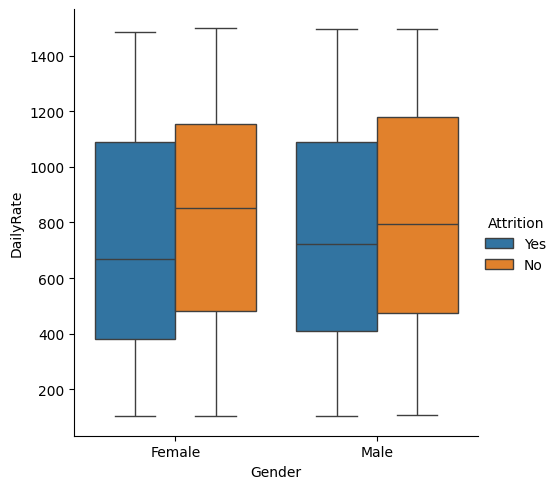

In [13]:
sns.catplot(x='Gender', y='DailyRate', hue='Attrition', kind='box', data=data)

<Axes: >

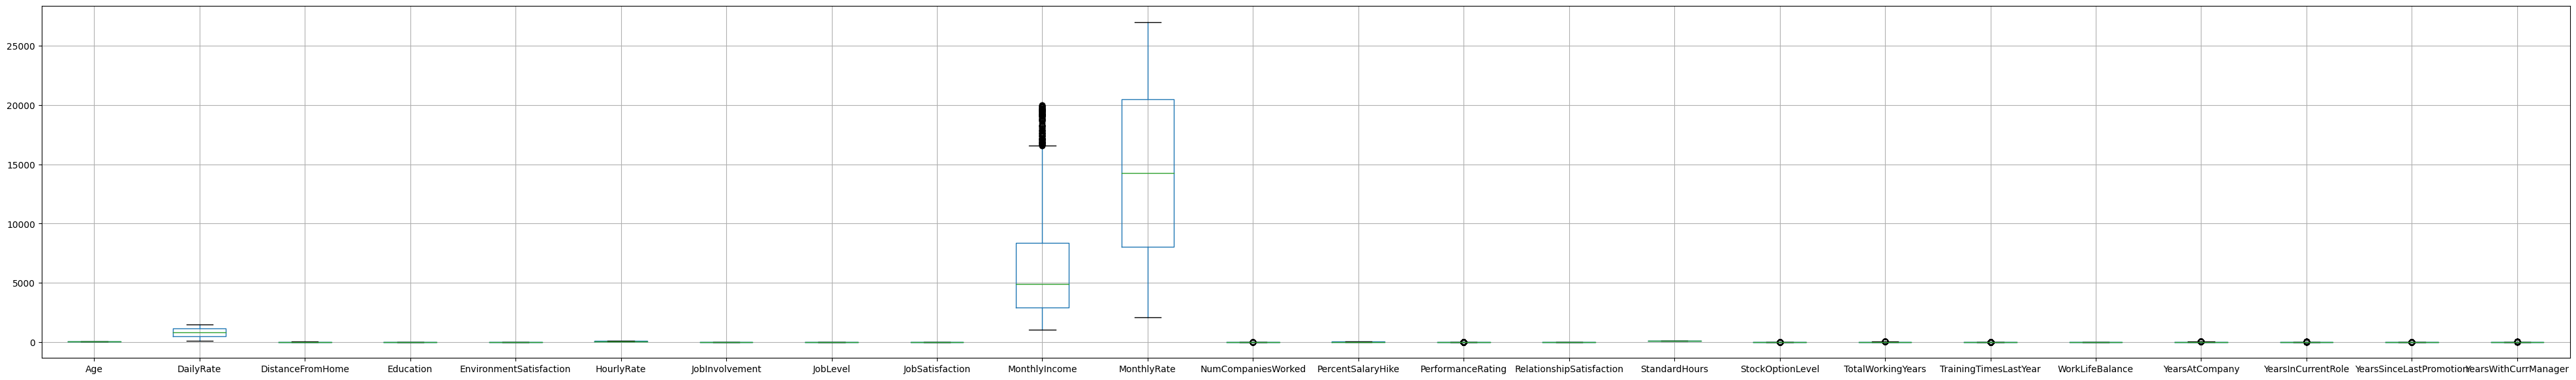

In [14]:
plt.figure(figsize=(50, 7))
data.boxplot()

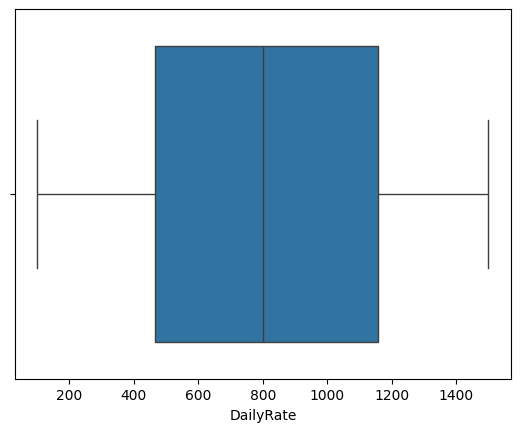

In [15]:
features = ['DailyRate']
for feature in features:
    sns.boxplot(x=feature, data=data)
    plt.show()

In [16]:
# train = data[(data['AGE'] <= 60) & (data['PAY_0'] <=2) & (data['PAY_2'] <=2) & (data['PAY_3'] <=2) & (data['PAY_4'] <=2) & (data['PAY_5'] <=2) & (data['PAY_6'] <=2) & (data['LIMIT_BAL'] <=600000)]
train = data

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [18]:
train.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [20]:
train = pd.get_dummies(train, columns=['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus' ], dtype=int, drop_first=True) # change education and marriage to categorical variables

In [21]:
train.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [22]:
encoders_nums = {
    "Gender": {"Female": 0, "Male": 1},
    "OverTime": {"No": 0, "Yes": 1},
    "Attrition": {"No": 0, "Yes": 1},

}
train = train.replace(encoders_nums)

In [23]:
train

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,...,0,0,0,0,0,0,1,0,1,0


In [24]:
X = train.drop('Attrition', axis=1)
y = train.Attrition


In [25]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [26]:
columns = train.drop('Attrition', axis=1).columns

In [27]:
columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
 

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y) # make the x y balanced

In [29]:
y.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [30]:
X.value_counts()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Research & Development  Department_Sales  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single
21   585        15                2          4             

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # scale the data to make it easier for the model to learn

In [32]:
X

array([[ 0.61580999,  0.85104375, -1.13962904, ..., -0.22116816,
        -0.71098137,  1.53761389],
       [ 1.50863716, -1.32745367, -0.23286359, ..., -0.22116816,
         1.40650662, -0.65035833],
       [ 0.1693964 ,  1.56838616, -1.01009112, ..., -0.22116816,
        -0.71098137,  1.53761389],
       ...,
       [-0.61182738, -0.45658411,  0.93297771, ..., -0.22116816,
         1.40650662, -0.65035833],
       [-1.50465456, -1.20833777, -0.62147735, ..., -0.22116816,
        -0.71098137,  1.53761389],
       [-0.50022399,  0.85633779, -0.75101528, ..., -0.22116816,
        -0.71098137, -0.65035833]])

In [33]:
from sklearn.model_selection import train_test_split
test_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42)

# logistic regression

In [34]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.7324324324324324


正則化是機器學習和統計模型中用於防止過擬合（overfitting）的一種技術。過擬合發生在模型過於複雜，以至於它開始捕捉訓練數據中的隨機噪聲而不是底層的數據分佈。正則化通過對模型增加一個懲罰項（penalty term）來解決這個問題，這有助於降低模型的複雜性，從而提高其泛化能力。

### **正則化的主要類型**

1. **L1 正則化（Lasso）**:
    - 在L1正則化中，懲罰項是模型權重的絕對值之和。
    - 公式表示為：損失函數 + λ * (Σ |w|)，其中 w 是模型權重，λ 是正則化強度。
    - L1 正則化有助於生成一個稀疏模型，其中一些權重變為零。這意味著它可以用於特徵選擇。
2. **L2 正則化（Ridge）**:
    - 在L2正則化中，懲罰項是模型權重的平方和。
    - 公式表示為：損失函數 + λ * (Σ w²)。
    - L2 正則化會使權重更平均分布，並傾向於避免讓任何一個權重變得過大。這有助於處理特徵之間的多重共線性問題。
3. **彈性網（Elastic Net）**:
    - 彈性網結合了L1和L2正則化。
    - 它在懲罰項中同時包含權重的絕對值和平方和。
    - 彈性網通常在特徵之間有關聯時使用，當需要進行特徵選擇同時控制模型參數的時候特別有用。

### **正則化的作用**

- **防止過擬合**:
    - 正則化通過懲罰過於複雜的模型來減少過擬合。
    - 它限制了模型的自由度，使模型不能完美擬合訓練數據中的每一個細節。
- **提高模型泛化能力**:
    - 通過減少模型的複雜性，正則化有助於提高模型在未見數據上的性能。
- **處理共線性問題**:
    - 特別是L2正則化，它能夠減少特徵間的相互依賴，這在處理共線性高的數據時非常有幫助。

### **調整正則化強度**

- 正則化的強度通常由一個參數（比如 λ）控制。
- 選擇一個適當的 λ 值非常關鍵。太小的 λ 值會導致過擬合，而太大的 λ 值則可能導致模型過於簡單（underfitting）。
- 在實踐中，通常通過交叉驗證來找到最佳的 λ 值。

In [36]:
param_lr = {'penalty': ['none','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

這段代碼使用了 Scikit-learn 的 **`GridSearchCV`** 函數，用於尋找邏輯回歸（**`LogisticRegression`**）模型的最佳參數。我將詳細解釋每個部分及其參數：

### **`GridSearchCV` 功能**

**`GridSearchCV`** 是一種廣泛使用的方法，用於自動化地尋找最佳參數組合，從而優化模型的性能。它通過在指定的參數範圍內進行積極的搜索和交叉驗證來實現這一點。

### **參數解釋**

1. **第一個參數 `LogisticRegression()`**:
    - 這是要進行調優的模型。在這個例子中，使用的是邏輯回歸模型。
    - **`LogisticRegression`** 是一種常用於二元分類問題的模型。
2. **第二個參數 `param_lr`**:
    - 這是一個字典，包含了要嘗試的參數範圍。
    - 在您的代碼中，**`param_lr = {'penalty': ['none','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}`**。
    - **`penalty`** 參數用於指定正則化類型，而 **`C`** 是正則化強度的倒數。
3. **`scoring='accuracy'`**:
    - 這個參數指定了評估模型性能的指標。在這裡使用的是「準確度」（accuracy）。
    - 準確度是模型正確預測的樣本數佔總樣本數的比例。
4. **`n_jobs=-1`**:
    - 這個參數決定了用於計算的CPU核心數量。
    - **`n_jobs=-1`** 表示使用所有可用的核心。
5. **`verbose=1`**:
    - 這個參數控制輸出的詳細程度。數字越大，輸出的信息越詳細。
    - 在這個例子中，**`verbose=1`** 提供了較詳細的輸出，這有助於跟蹤Grid Search的進度和性能。
6. **`cv=5`**:
    - 這個參數指定了交叉驗證的折數。
    - **`cv=5`** 表示使用5折交叉驗證。在5折交叉驗證中，數據集被分成五個部分，每個部分依次作為驗證集，其餘部分作為訓練集。

### **`grid_lr.fit(X_train, y_train)`**

- 這行代碼執行實際的網格搜索。
- **`X_train`** 和 **`y_train`** 分別是訓練數據集的特徵和標籤。
- **`fit`** 方法將對每一種參數組合進行訓練和評估，並使用交叉驗證來確保結果的穩健性。
- 最終，**`grid_lr`** 將包含表現最佳的參數組合和相關信息。

In [37]:
grid_lr = GridSearchCV(LogisticRegression(), param_lr,
                       scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=1)

In [38]:
optimized_lr = grid_lr.best_estimator_
optimized_lr

LogisticRegression(C=1)

In [39]:
grid_lr.best_score_

0.9032336432939599

In [40]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [41]:
lr_train_pred = optimized_lr.predict(X_train)
lr_test_pred = optimized_lr.predict(X_test)

In [42]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(lr_train_pred, y_train))
logistic_accuracy = accuracy_score(lr_test_pred, y_test)
print("The accuracy on test data is ", accuracy_score(lr_test_pred, y_test))
print("The precision on test data is ", precision_score(lr_test_pred, y_test))
print("The recall on test data is ", recall_score(lr_test_pred, y_test))
print("The f1 on test data is ", f1_score(lr_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(lr_test_pred, y_test))

The accuracy on train data is  0.9154113557358053
The accuracy on test data is  0.904054054054054
The precision on test data is  0.889487870619946
The recall on test data is  0.9166666666666666
The f1 on test data is  0.9028727770177838
The roc_score on test data is  0.9043859649122806


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

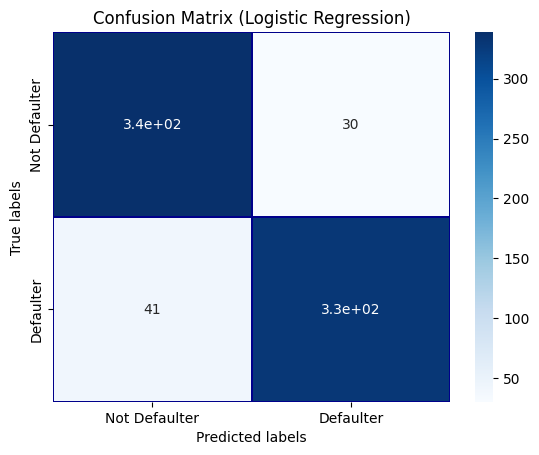

In [43]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, lr_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Logistic Regression)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

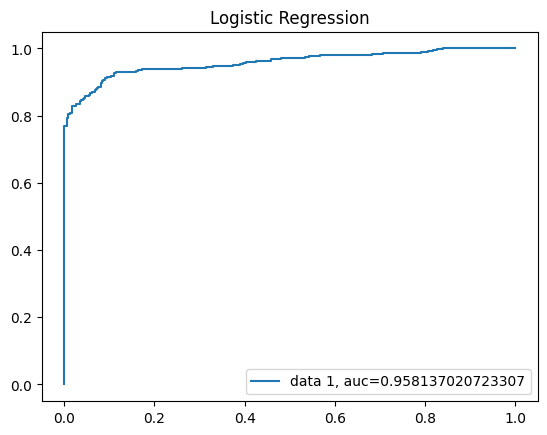

In [44]:
y_preds_proba_lr = optimized_lr.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.show()

# Decision Tree


1. **`DecisionTreeClassifier(max_depth=8, max_features=15, random_state=42)`**:
    - **`DecisionTreeClassifier`** 是一種常用於分類問題的決策樹模型。
    - **`max_depth=8`**: 這個參數限制了樹的最大深度。在這裡設為8意味著樹可以分裂成最多8層。控制樹的深度有助於防止過擬合。
    - **`max_features=15`**: 這表示在尋找最佳分割時，每次只考慮15個特徵。這可以提高訓練速度，同時也有助於防止過擬合。
    - **`random_state=42`**: 這是隨機數生成器的種子。設定這個值確保了結果的可重現性。

### **訓練過程**

1. **`dt.fit(X_train, y_train)`**:
    - **`fit`** 方法用於在訓練數據集（**`X_train`**, **`y_train`**）上訓練模型。
    - **`X_train`** 包含了訓練數據的特徵，而 **`y_train`** 是相應的標籤。

### **模型評估**

1. **`print(dt.score(X_test, y_test))`**:
    - **`score`** 方法用於評估模型在測試數據集（**`X_test`**, **`y_test`**）上的表現。
    - 它返回的是模型的準確率，即模型正確預測的標籤佔總標籤的比例。
    - 這一步是檢查模型在未見數據上的泛化能力的關鍵。

### **總結**

這段代碼展示了使用決策樹進行分類的基本流程：模型初始化、訓練和性能評估。決策樹是一種直觀且常用的分類方法，它通過樹狀結構來進行決策，每個節點代表一個特徵的檢查，而每個分支則代表一個決策方向。

理解這一過程對於數據分析學生至關重要，因為它提供了關於如何訓練、調整參數以及評估機器學習模型的基礎知識。此外，理解不同參數（如 **`max_depth`** 和 **`max_features`**）對模型性能的影響是進行有效模型調優的關鍵。

In [45]:
dt = DecisionTreeClassifier(max_depth=8, max_features=15, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.8364864864864865


In [46]:
param_dt = {
    # 'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'max_depth': range(5, 15),  # Maximum depth of each tree
    # Minimum number of samples required to split an internal node
    'min_samples_split': range(2, 10),
    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': range(1, 4),
    'max_features': range(5, 18)
}
# param_dt = {
#     'max_depth': [5, 10, 15],  # Maximum depth of each tree
#     # Minimum number of samples required to split an internal node
#     'min_samples_split': [2, 5, 10],
#     # Minimum number of samples required to be at a leaf node
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [5, 10, 15, 18]
# }


grid_dt = GridSearchCV(estimator=dt, param_grid=param_dt,
                       cv=4, scoring='accuracy', n_jobs=-1, verbose=1)

grid_dt.fit(X_train, y_train)

Fitting 4 folds for each of 3120 candidates, totalling 12480 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=8, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15),
                         'max_features': range(5, 18),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=1)

In [47]:
optimized_dt = grid_dt.best_estimator_

In [48]:
grid_dt.best_score_

0.82443123227636

In [49]:
grid_dt.best_params_

{'max_depth': 14,
 'max_features': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
dt_train_pred = optimized_dt.predict(X_train)
dt_test_pred = optimized_dt.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(dt_train_pred, y_train))
decision_tree_accuracy = accuracy_score(dt_test_pred, y_test)
print("The accuracy on test data is ", accuracy_score(dt_test_pred, y_test))
print("The precision on test data is ", precision_score(dt_test_pred, y_test))
print("The recall on test data is ", recall_score(dt_test_pred, y_test))
print("The f1 on test data is ", f1_score(dt_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(dt_test_pred, y_test))

The accuracy on train data is  1.0
The accuracy on test data is  0.8094594594594594
The precision on test data is  0.8328840970350404
The recall on test data is  0.7963917525773195
The f1 on test data is  0.8142292490118577
The roc_score on test data is  0.8101276944704778


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

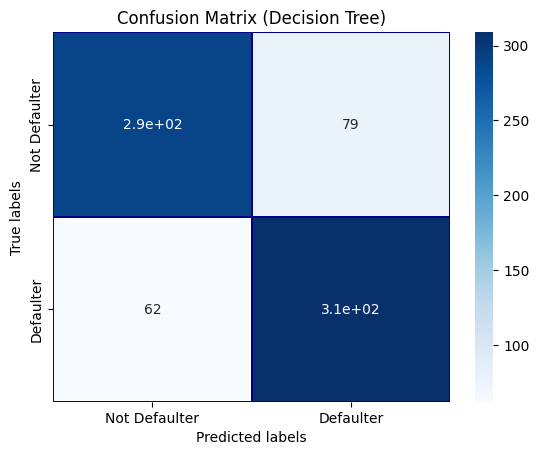

In [52]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, dt_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Decision Tree)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

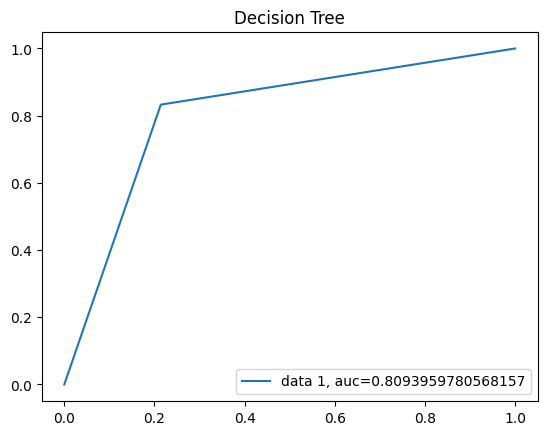

In [53]:
y_preds_proba_dt = optimized_dt.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Decision Tree')
plt.legend(loc=4)
plt.show()

# Random Forest

### **隨機森林分類器（RandomForestClassifier）**

1. **創建模型**:
    - **`RandomForestClassifier(max_depth=10, max_features=15, random_state=42)`** 創建了一個隨機森林分類器的實例。
    - **`max_depth=10`**: 這個參數限制了每棵樹的最大深度。設定深度可以幫助防止過擬合，因為過深的樹可能會學習到訓練數據的噪聲。
    - **`max_features=15`**: 指每次分裂時考慮的最大特徵數。這可以幫助提高模型的多樣性，減少樹與樹之間的相關性，並提高泛化能力。
    - **`random_state=42`**: 確保每次運行代碼時結果的一致性，方便調試和比較。
2. **訓練模型**:
    - **`rf.fit(X_train, y_train)`**: 這一步將模型與訓練數據（**`X_train`** 和 **`y_train`**）進行擬合。**`X_train`** 包含了訓練數據的特徵，而 **`y_train`** 是相應的標籤。
3. **評估模型**:
    - **`print(rf.score(X_test, y_test))`**: 這行代碼評估了模型在測試數據集（**`X_test`**, **`y_test`**）上的表現。
    - **`score`** 方法返回的是準確率，即模型正確預測的標籤佔總標籤的比例。
    - 這一步驗證了模型在未見過的數據上的泛化能力。

### **隨機森林的優點**

隨機森林是一種集成學習方法，它通過組合多棵決策樹來提高模型的穩定性和準確性。它的主要優點包括：

- **泛化能力強**：通過平均多棵樹的預測，減少了模型的方差，使得模型對於未見數據有更好的泛化能力。
- **過擬合風險低**：相對於單一的決策樹，隨機森林更不容易過擬合。
- **特徵選擇的靈活性**：在每次分裂過程中考慮的隨機特徵子集，使得隨機森林可以更好地處理具有大量特徵的數據集。

In [54]:
rf = RandomForestClassifier(max_depth=10, max_features=15, random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.918918918918919


### **`max_depth` 的意義與影響**

1. **意義**:
    - **`max_depth`** 參數指定了決策樹的最大深度，即樹可以生長的最大層數。
    - 深度限制了從根節點到最遠葉節點的最長路徑。
2. **對模型的影響**:
    - **防止過擬合**：較小的 **`max_depth`** 可以防止樹過於複雜，這有助於減少過擬合的風險。過深的樹可能會學習到訓練數據中的噪聲。
    - **影響模型複雜度**：較大的深度允許模型學習更細分的模式，但也可能導致模型在訓練數據上過度擬合，從而影響其在新數據上的表現。
    - **平衡準確度和泛化能力**：適當的 **`max_depth`** 需要根據具體問題進行調整，以平衡訓練準確度和泛化能力。

### **`max_features` 的意義與影響**

1. **意義**:
    - **`max_features`** 決定了在分裂決策樹節點時，每次隨機選擇的特徵數量的上限。
    - 這個參數可以是整數（直接指定特徵數量）、浮點數（作為特徵總數的比例）、**`"auto"`**（等於特徵數）、**`"sqrt"`**（特徵數的平方根）或 **`"log2"`**（以2為底的特徵數對數）。
2. **對模型的影響**:
    - **提高隨機性**：在隨機森林中，較小的 **`max_features`** 增加了模型中各個樹之間的差異，提高了整體模型的隨機性，從而可能提高其泛化能力。
    - **防止過擬合**：這個參數有助於減少模型對單一特徵的依賴，從而降低過擬合的風險。
    - **影響訓練速度**：較小的 **`max_features`** 可以加快訓練速度，因為在每次分裂時需要評估的特徵數量減少了。
    - **平衡特徵與決策的重要性**：適當的 **`max_features`** 值有助於平衡在決策過程中考慮的特徵數量和模型的預測能力。

In [55]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 350],  # Number of trees in the forest
#     'max_depth': [5, 10, 15],  # Maximum depth of each tree
#     # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': [5, 10, 15, 18]
# }

param_grid = {
    'n_estimators': [100, 170,180,190,200,210,220,230,240 ,300, 350],  # Number of trees in the forest
    'max_depth': [5, 10, 12,13,14, 15, 16,17,18],  # Maximum depth of each tree
    # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [3,4,5,6,7,8, 10, 15, 18]
}
# param_grid = {
#     'n_estimators': range(300, 300),  # Number of trees in the forest
#     'max_depth': range(5, 15),  # Maximum depth of each tree
#     # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': range(5, 18)
# }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=4, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 891 candidates, totalling 3564 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=10, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12, 13, 14, 15, 16, 17, 18],
                         'max_features': [3, 4, 5, 6, 7, 8, 10, 15, 18],
                         'n_estimators': [100, 170, 180, 190, 200, 210, 220,
                                          230, 240, 300, 350]},
             scoring='accuracy', verbose=1)

In [56]:
optimized_rf = grid_search.best_estimator_

In [57]:
grid_search.best_score_

0.9217810109993985

In [58]:
grid_search.best_params_

{'max_depth': 17, 'max_features': 3, 'n_estimators': 190}

In [59]:
rf_train_pred = optimized_rf.predict(X_train)
rf_test_pred = optimized_rf.predict(X_test)

In [60]:
print("The accuracy on train data is ", accuracy_score(rf_train_pred, y_train))
random_forest_accuracy = accuracy_score(rf_test_pred, y_test)
print("The accuracy on test data is ", accuracy_score(rf_test_pred, y_test))
print("The precision on test data is ", precision_score(rf_test_pred, y_test))
print("The recall on test data is ", recall_score(rf_test_pred, y_test))
print("The f1 on test data is ", f1_score(rf_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(rf_test_pred, y_test))

The accuracy on train data is  1.0
The accuracy on test data is  0.9283783783783783
The precision on test data is  0.9110512129380054
The recall on test data is  0.9441340782122905
The f1 on test data is  0.9272976680384087
The roc_score on test data is  0.9288733218286584


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

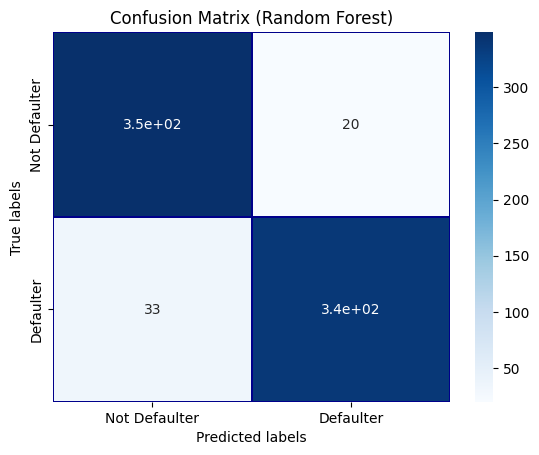

In [61]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, rf_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Random Forest)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

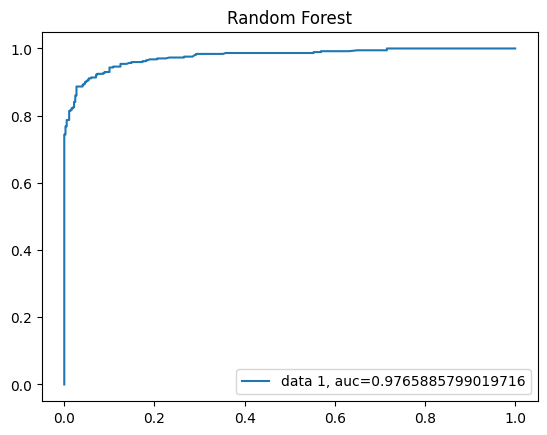

In [62]:
y_preds_proba_rf = optimized_rf.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Random Forest')
plt.legend(loc=4)
plt.show()

# XGBoost

### **基本概念**

1. **梯度提升（Gradient Boosting）**:
    - XGBoost 屬於梯度提升的家族。梯度提升是一種機器學習技術，它逐步建立模型，每一步都試圖糾正前一步的錯誤。
    - 基本思想是結合多個簡單的模型（如決策樹），每個模型都專注於改進前一個模型的不足之處。
2. **梯度提升決策樹（GBDT）**:
    - XGBoost 使用決策樹作為基學習器（weak learner）。這些樹是按順序一個接一個建立的，每棵新樹的建立都基於之前樹的結果。

### **XGBoost 的特點**

1. **效率和靈活性**:
    - XGBoost 在計算上非常高效。它使用了一些先進的技術，如樹剪枝（tree pruning）、正則化（regularization）和分布式計算，以提高速度和效率。
    - 它非常靈活，支持自定義優化目標和評估標準。
2. **正則化**:
    - XGBoost 在梯度提升的基礎上增加了正則化項（L1 和 L2 正則化），這有助於避免過擬合，提高模型的泛化能力。
3. **處理缺失值**:
    - XGBoost 能自動處理缺失值的問題。在訓練過程中，它會學習缺失值應該如何處理。
4. **樹剪枝**:
    - 與傳統的梯度提升方法不同，XGBoost 從最大深度開始生長樹，然後進行剪枝。這種「深度優先」的方法有助於減少過擬合的風險。
5. **內建交叉驗證**:
    - XGBoost 可以在每一輪迭代過程中進行交叉驗證，這使得模型的調參和評估更加簡單高效。
6. **多線程和分布式處理**:
    - XGBoost 支持多線程，這意味著它可以利用多核 CPU 進行快速計算。它還支持分布式計算，可以處理大型數據集。

### **XGBoost 和 `XGBClassifier`**

- **XGBoost** 是一種基於梯度提升決策樹的機器學習算法，廣泛用於分類問題，尤其是在具有高維特徵的數據集上表現出色。
- **`XGBClassifier(objective='binary:logistic')`**:
    - 這是創建 XGBoost 分類器的步驟，用於二元分類。
    - **`objective='binary:logistic'`** 指定了損失函數的類型，適用於二元分類問題。

### **GridSearchCV 參數優化**

- **`GridSearchCV`** 是一種系統化尋找最佳參數（hyperparameters）組合的方法，用於提升模型性能。
- **參數解釋**:
    - **`estimator=xgb`**: 指定要優化的模型。
    - **`param_grid=parm_xgb`**: 指定要嘗試的參數範圍。在這裡，有三個參數：
        - **`max_depth`**: 決策樹的最大深度。
        - **`n_estimators`**: 模型中梯度提升樹的數量。
        - **`learning_rate`**: 每棵樹對最終結果的貢獻率，也稱為步長。
    - **`scoring='accuracy'`**: 評估模型性能的指標，這裡使用準確度。
    - **`cv=5`**: 交叉驗證的折數，這裡使用5折交叉驗證。
    - **`n_jobs=-1`**: 使用所有可用的 CPU 核心進行計算。
    - **`verbose=1`**: 表示顯示詳細的進度信息。

### **模型訓練與結果**

- **`grid_result = grid_xgb.fit(X_train, y_train)`**:
    - 這一步將 **`GridSearchCV`** 應用於訓練數據集，開始尋找最佳參數組合。
    - **`X_train`** 和 **`y_train`** 分別是特徵數據和目標標籤。
    - **`grid_result`** 保存了優化過程的結果，包括最佳參數、最佳模型等。

In [63]:
xgb = XGBClassifier(objective='binary:logistic')
parm_xgb = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12], 'n_estimators': [
    280, 290, 300, 305, 310, 315, 320], 'learning_rate': [0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=parm_xgb,
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_result = grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


In [64]:
optimized_xgb = grid_xgb.best_estimator_

In [65]:
grid_xgb.best_score_

0.9101951914216302

In [66]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 280}

In [67]:
xgb_train_pred = optimized_xgb.predict(X_train)
xgb_test_pred = optimized_xgb.predict(X_test)

In [68]:
y_train.shape

(1726,)

In [69]:
print("The accuracy on train data is ",
      accuracy_score(xgb_train_pred, y_train))
xgboost_accuracy = accuracy_score(xgb_test_pred, y_test)
print("The accuracy on test data is ", accuracy_score(xgb_test_pred, y_test))
print("The precision on test data is ", precision_score(xgb_test_pred, y_test))
print("The recall on test data is ", recall_score(xgb_test_pred, y_test))
print("The f1 on test data is ", f1_score(xgb_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(xgb_test_pred, y_test))

The accuracy on train data is  1.0
The accuracy on test data is  0.927027027027027
The precision on test data is  0.9029649595687331
The recall on test data is  0.9490084985835694
The f1 on test data is  0.925414364640884
The roc_score on test data is  0.927992621384808


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

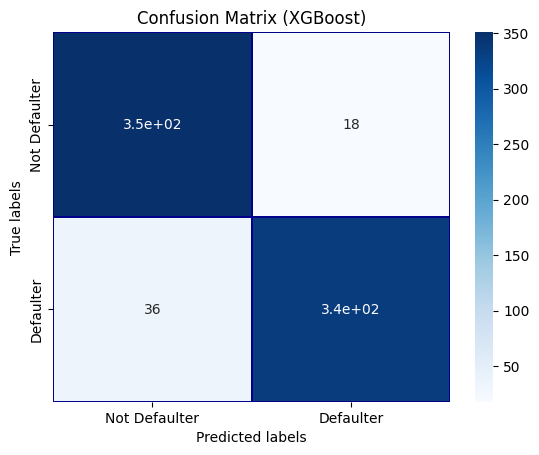

In [70]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, xgb_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (XGBoost)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

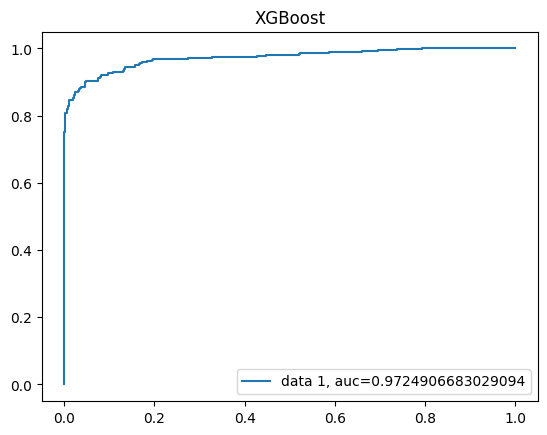

In [71]:
y_preds_proba_xgb = optimized_xgb.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('XGBoost')
plt.legend(loc=4)
plt.show()

### **特徵重要性提取**

- **`feature_importances_xgb = pd.DataFrame(optimized_xgb.feature_importances_, index=columns, columns=['importance_xgb']).sort_values('importance_xgb', ascending=False)[:20]`**:
    - **`optimized_xgb.feature_importances_`** 獲取了 XGBoost 模型中各個特徵的重要性。這些值表示每個特徵對於模型的預測能力貢獻的相對重要性。
    - 這些重要性值被轉換成了一個 Pandas DataFrame，其中 **`index=columns`** 指定了每個特徵的名稱。
    - **`.sort_values('importance_xgb', ascending=False)`** 對特徵按其重要性進行降序排序。
    - **`[:20]`** 選取了前20個最重要的特徵。

### **數據可視化**

- **使用 Matplotlib 繪製條形圖**:
    - **`plt.subplots(figsize=(17, 6))`**: 創建一個圖形和一個子圖，設定圖形大小為寬17英寸、高6英寸。
    - **`plt.title("Feature importances from XGBoost")`**: 給圖形添加標題。
    - **`plt.bar(...)`**: 繪製條形圖，展示每個特徵的重要性。**`feature_importances_xgb.index`** 和 **`feature_importances_xgb['importance_xgb']`** 分別提供了 X 軸（特徵名稱）和 Y 軸（重要性值）的數據。
    - **`plt.xticks(...)`**: 設置 X 軸的刻度標籤，並將其旋轉 45 度，以便於閱讀。
    - **`plt.show()`**: 顯示圖表。

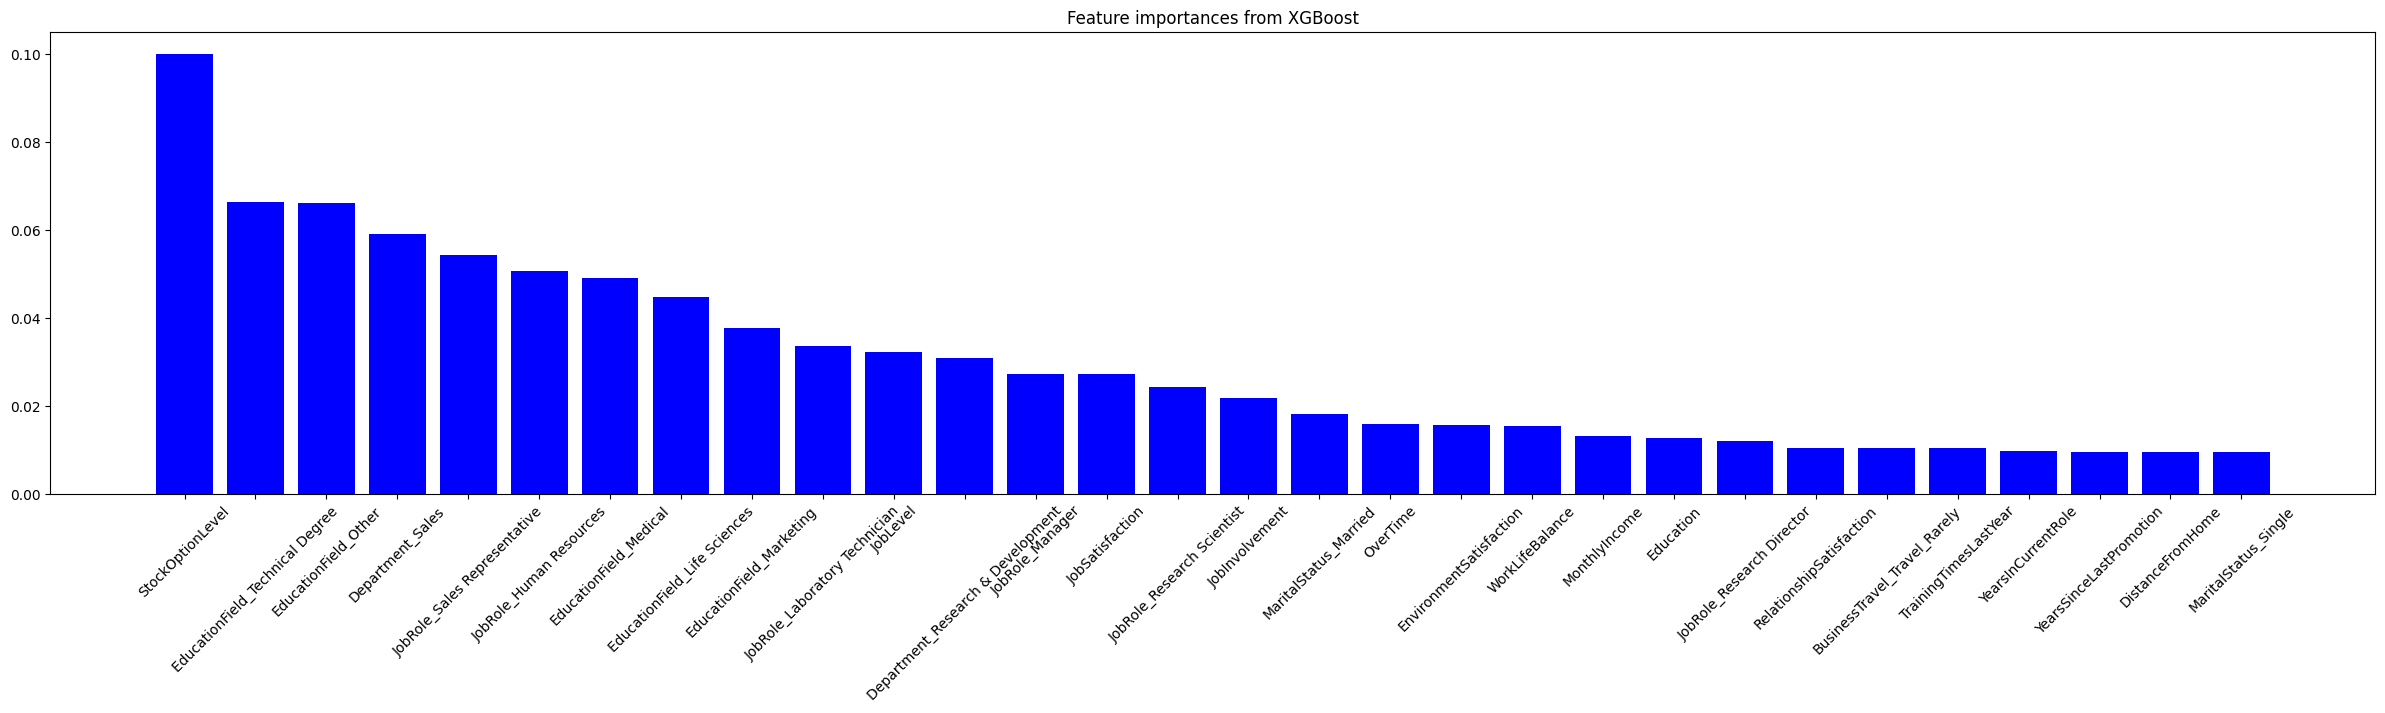

In [72]:
# Feature Importance~
feature_importances_xgb = pd.DataFrame(optimized_xgb.feature_importances_,
                                       index=columns,
                                       columns=['importance_xgb']).sort_values('importance_xgb',
                                                                               ascending=False)[:30]

plt.subplots(figsize=(30, 6))
plt.title("Feature importances from XGBoost")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation=45)
# plt.xlim([-1, X.shape[1]])
plt.show()

# XGBoost with Hyperparameter 

In [74]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [75]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.metrics import accuracy_score

# Define the hyperparameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'gamma': hp.uniform('gamma', 0.1, 0.5),
    'reg_alpha': hp.quniform('reg_alpha', 0, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)
}


def objective(space):
    clf = xgb.XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        learning_rate=space['learning_rate'],
        objective='binary:logistic',
        eval_metric='auc'
    )

    evaluation = [(X_test, y_test)]

    clf.fit(X_train, y_train, eval_set=evaluation,
            early_stopping_rounds=10, verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK}


trials = Trials()

best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=150,
                        trials=trials)

print("The best hyperparameters are: ", best_hyperparams)

SCORE:                                                 
0.9256756756756757                                     
  1%|          | 1/150 [00:00<00:28,  5.19trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.8216216216216217                                                                
SCORE:                                                                            
0.9067567567567567                                                                
SCORE:                                                                            
0.9013513513513514                                                                
  3%|▎         | 4/150 [00:00<00:10, 13.50trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9094594594594595                                                                
SCORE:                                                                            
0.9027027027027027                                                                
SCORE:                                                                            
0.904054054054054                                                                 
  4%|▍         | 6/150 [00:00<00:12, 11.80trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9067567567567567                                                                
SCORE:                                                                            
0.904054054054054                                                                 
SCORE:                                                                            
0.8202702702702702                                                                
SCORE:                                                                             
0.904054054054054                                                                  
  7%|▋         | 10/150 [00:00<00:10, 12.75trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is depr

SCORE:                                                                             
0.9013513513513514                                                                 
SCORE:                                                                             
0.9027027027027027                                                                 
SCORE:                                                                             
0.8986486486486487                                                                 
SCORE:                                                                             
0.85                                                                               
  9%|▉         | 14/150 [00:01<00:10, 12.71trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is depr

SCORE:                                                                             
0.9148648648648648                                                                 
SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.9121621621621622                                                                 
 11%|█▏        | 17/150 [00:01<00:09, 14.02trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9135135135135135                                                                 
SCORE:                                                                             
0.8486486486486486                                                                 
SCORE:                                                                             
0.9202702702702703                                                                 
 14%|█▍        | 21/150 [00:01<00:09, 13.58trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9216216216216216                                                                 
SCORE:                                                                             
0.9148648648648648                                                                 
SCORE:                                                                             
0.9013513513513514                                                                 
 15%|█▌        | 23/150 [00:01<00:11, 11.20trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.8824324324324324                                                                 
SCORE:                                                                             
0.9135135135135135                                                                 
 17%|█▋        | 25/150 [00:02<00:10, 11.42trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.922972972972973                                                                  
 18%|█▊        | 27/150 [00:02<00:11, 10.74trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9243243243243243                                                                 
SCORE:                                                                             
0.9121621621621622                                                                 
SCORE:                                                                             
0.918918918918919                                                                  
 21%|██        | 31/150 [00:02<00:11, 10.38trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9148648648648648                                                                 
SCORE:                                                                             
0.9108108108108108                                                                 
SCORE:                                                                             
0.9148648648648648                                                                 
 22%|██▏       | 33/150 [00:02<00:11,  9.80trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9216216216216216                                                                 
SCORE:                                                                             
0.9256756756756757                                                                 
SCORE:                                                                             
0.9054054054054054                                                                 
 25%|██▍       | 37/150 [00:03<00:11, 10.17trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9067567567567567                                                                 
SCORE:                                                                             
0.9108108108108108                                                                 
SCORE:                                                                             
0.9175675675675675                                                                 
 26%|██▌       | 39/150 [00:03<00:10, 10.38trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9148648648648648                                                                 
SCORE:                                                                             
0.9175675675675675                                                                 
 27%|██▋       | 41/150 [00:03<00:10, 10.77trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9054054054054054                                                                 
SCORE:                                                                             
0.9121621621621622                                                                 
 29%|██▊       | 43/150 [00:03<00:10,  9.75trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9162162162162162                                                                 
SCORE:                                                                             
0.8972972972972973                                                                 
SCORE:                                                                             
0.9108108108108108                                                                 
SCORE:                                                                             
0.8972972972972973                                                                 
 31%|███▏      | 47/150 [00:04<00:09, 10.53trial/s, best loss: -0.9256756756756757]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.927027027027027                                                                  
SCORE:                                                                             
0.8148648648648649                                                                
 33%|███▎      | 49/150 [00:04<00:09, 10.50trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.904054054054054                                                                 
SCORE:                                                                            
0.8959459459459459                                                                
 35%|███▍      | 52/150 [00:04<00:09, 10.89trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.8324324324324325                                                                
SCORE:                                                                            
0.9121621621621622                                                                
 36%|███▌      | 54/150 [00:04<00:08, 11.20trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9054054054054054                                                                
SCORE:                                                                            
0.8121621621621622                                                                
SCORE:                                                                            
0.9081081081081082                                                                
SCORE:                                                                            
0.9027027027027027                                                                
 39%|███▊      | 58/150 [00:05<00:07, 11.90trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is depr

SCORE:                                                                            
0.9243243243243243                                                                
SCORE:                                                                            
0.8932432432432432                                                                
SCORE:                                                                            
0.922972972972973                                                                 
 40%|████      | 60/150 [00:05<00:08, 10.10trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9121621621621622                                                                
SCORE:                                                                            
0.9081081081081082                                                                
SCORE:                                                                            
0.9054054054054054                                                                
 43%|████▎     | 64/150 [00:05<00:07, 11.06trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9094594594594595                                                                
SCORE:                                                                            
0.918918918918919                                                                 
SCORE:                                                                            
0.9202702702702703                                                                
 44%|████▍     | 66/150 [00:06<00:07, 11.10trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9135135135135135                                                                
SCORE:                                                                            
0.8662162162162163                                                                
SCORE:                                                                            
0.927027027027027                                                                 
 47%|████▋     | 70/150 [00:06<00:07, 10.66trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9216216216216216                                                                
SCORE:                                                                            
0.9135135135135135                                                                
 48%|████▊     | 72/150 [00:06<00:07, 10.54trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9216216216216216                                                                
SCORE:                                                                            
0.8405405405405405                                                                
SCORE:                                                                            
0.8513513513513513                                                                
SCORE:                                                                            
0.9202702702702703                                                                
 51%|█████     | 76/150 [00:06<00:06, 10.82trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is depr

SCORE:                                                                            
0.8729729729729729                                                                
SCORE:                                                                            
0.9121621621621622                                                                
 52%|█████▏    | 78/150 [00:07<00:07,  9.93trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9067567567567567                                                                
SCORE:                                                                            
0.9094594594594595                                                                
SCORE:                                                                            
0.922972972972973                                                                 
 53%|█████▎    | 80/150 [00:07<00:09,  7.64trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9094594594594595                                                                
SCORE:                                                                            
0.9121621621621622                                                                
SCORE:                                                                            
0.904054054054054                                                                 
 55%|█████▌    | 83/150 [00:08<00:08,  7.84trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9135135135135135                                                                
SCORE:                                                                            
0.9067567567567567                                                                
 57%|█████▋    | 86/150 [00:08<00:08,  7.84trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9027027027027027                                                                
SCORE:                                                                            
0.9162162162162162                                                                
SCORE:                                                                            
0.922972972972973                                                                 
 59%|█████▉    | 89/150 [00:08<00:07,  8.65trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.904054054054054                                                                 
SCORE:                                                                            
0.9162162162162162                                                                
SCORE:                                                                            
0.9202702702702703                                                                
 61%|██████▏   | 92/150 [00:08<00:05,  9.83trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9054054054054054                                                                
SCORE:                                                                            
0.8067567567567567                                                                
SCORE:                                                                            
0.9243243243243243                                                                
 63%|██████▎   | 95/150 [00:09<00:05, 10.80trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.9243243243243243                                                                
SCORE:                                                                            
0.9135135135135135                                                                
SCORE:                                                                            
0.9027027027027027                                                                
SCORE:                                                                            
0.9094594594594595                                                                
 66%|██████▌   | 99/150 [00:09<00:04, 10.74trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is depr

SCORE:                                                                            
0.9054054054054054                                                                
SCORE:                                                                            
0.9175675675675675                                                                 
 67%|██████▋   | 101/150 [00:09<00:05,  9.00trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9121621621621622                                                                 
SCORE:                                                                             
0.9121621621621622                                                                 
 69%|██████▊   | 103/150 [00:10<00:06,  7.23trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.8891891891891892                                                                 
SCORE:                                                                             
0.9202702702702703                                                                 
 70%|███████   | 105/150 [00:10<00:05,  8.16trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.8986486486486487                                                                 
SCORE:                                                                             
0.9148648648648648                                                                 
 72%|███████▏  | 108/150 [00:10<00:04,  9.80trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.922972972972973                                                                  
SCORE:                                                                             
0.9054054054054054                                                                 
 73%|███████▎  | 110/150 [00:11<00:04,  8.19trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9202702702702703                                                                 
SCORE:                                                                             
0.904054054054054                                                                  
SCORE:                                                                             
0.8391891891891892                                                                 
 75%|███████▍  | 112/150 [00:11<00:04,  9.22trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9067567567567567                                                                 
SCORE:                                                                             
0.9216216216216216                                                                 
 77%|███████▋  | 115/150 [00:11<00:04,  7.79trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9108108108108108                                                                 
SCORE:                                                                             
0.9243243243243243                                                                 
SCORE:                                                                             
0.9108108108108108                                                                 
 78%|███████▊  | 117/150 [00:11<00:04,  7.64trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9108108108108108                                                                 
SCORE:                                                                             
0.9148648648648648                                                                 
SCORE:                                                                             
0.9                                                                                
 81%|████████  | 121/150 [00:12<00:03,  9.53trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9067567567567567                                                                 
SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.9094594594594595                                                                 
                                                                                   

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9216216216216216                                                                 
SCORE:                                                                             
0.9027027027027027                                                                 
 84%|████████▍ | 126/150 [00:12<00:02, 10.99trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9135135135135135                                                                 
SCORE:                                                                             
0.9202702702702703                                                                 
 85%|████████▌ | 128/150 [00:12<00:02,  9.78trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.8905405405405405                                                                 
SCORE:                                                                             
0.9013513513513514                                                                 
 87%|████████▋ | 130/150 [00:13<00:02,  8.52trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9081081081081082                                                                 
SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.8783783783783784                                                                 
 88%|████████▊ | 132/150 [00:13<00:02,  8.02trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9067567567567567                                                                 
SCORE:                                                                             
0.9135135135135135                                                                 
SCORE:                                                                             
0.9013513513513514                                                                 
 90%|█████████ | 135/150 [00:13<00:01,  9.16trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9054054054054054                                                                 
SCORE:                                                                             
0.9162162162162162                                                                 
SCORE:                                                                             
0.9216216216216216                                                                 
 93%|█████████▎| 139/150 [00:14<00:01,  8.31trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.918918918918919                                                                  
SCORE:                                                                             
0.922972972972973                                                                  
 94%|█████████▍| 141/150 [00:14<00:01,  8.83trial/s, best loss: -0.927027027027027]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.9297297297297298                                                                 
 95%|█████████▍| 142/150 [00:14<00:01,  6.69trial/s, best loss: -0.9297297297297298]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                              
0.9081081081081082                                                                  
SCORE:                                                                              
0.9054054054054054                                                                  
SCORE:                                                                              
0.8743243243243243                                                                  
 97%|█████████▋| 145/150 [00:15<00:00,  7.43trial/s, best loss: -0.9297297297297298]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                              
0.927027027027027                                                                   
SCORE:                                                                              
0.9283783783783783                                                                  
 98%|█████████▊| 147/150 [00:15<00:00,  6.48trial/s, best loss: -0.9297297297297298]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                              
0.9243243243243243                                                                  
 99%|█████████▊| 148/150 [00:15<00:00,  6.19trial/s, best loss: -0.9297297297297298]

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                              
0.9162162162162162                                                                  
SCORE:                                                                              
0.9297297297297298                                                                  
100%|██████████| 150/150 [00:16<00:00,  9.24trial/s, best loss: -0.9297297297297298]
The best hyperparameters are:  {'colsample_bytree': 0.598921853720481, 'gamma': 0.28798222411474866, 'learning_rate': 0.01688447810744774, 'max_depth': 8.0, 'min_child_weight': 2.0, 'n_estimators': 730.0, 'reg_alpha': 1.0}


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



In [ ]:
space = {'max_depth': hp.uniform("max_depth", 3, 18),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.uniform('min_child_weight', 260, 330),
        'learning_rate' : hp.quniform('learning_rate', 0.05, 0.15, 0.01),
        'n_estimators': hp.uniform('n_estimators', 270, 330),
        'seed': 0
    }



# parm_xgb = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12], 
#     'n_estimators': [280, 290, 300, 305, 310, 315, 320], 
#     'learning_rate': [0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15]}

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators = int(space['n_estimators']), 
                    max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),
                    learning_rate = space['learning_rate'],
                    boosting = 'gbdt',
                    eval_metric="auc",
                    early_stopping_rounds=10
                    )
    
    evaluation = [( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, 

            verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.9)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals =150,
                        trials = trials)

[15:31:38] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "boosting" } are not used.

SCORE:                                                 
0.49864864864864866                                    
[15:31:38] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "boosting" } are not used.

SCORE:                                                                             
0.49864864864864866                                                                
[15:31:38] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767:    
Parameters: { "boosting" } are not used.

SCORE:                                                                             
0.49864864864864866                                                                
[15:31:38] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767:    
Parameters: { "boosting" } are not used.

SCORE:                                                

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6546928031007598, 'gamma': 1.2859835549767666, 'max_depth': 8.0, 'min_child_weight': 290.0, 'reg_alpha': 129.0, 'reg_lambda': 0.9486924091107136}


In [ ]:
print(trials.results)

[{'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status': 'ok'}, {'loss': -0.49864864864864866, 'status'

In [ ]:
xgb_train_pred = best_hyperparams.predict(X_train)
xgb_test_pred = best_hyperparams.predict(X_test)

AttributeError: 'dict' object has no attribute 'predict'

# NN 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLP = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (150,100,50), learning_rate = 'adaptive',
                                    verbose = 1, alpha = 0.05, max_iter = 200, n_iter_no_change = 10, tol = 0.0001,
                                    activation = 'relu')
MLP.fit(X_train, y_train)

Iteration 1, loss = 0.73566521
Iteration 2, loss = 0.72464013
Iteration 3, loss = 0.71163451
Iteration 4, loss = 0.69923533
Iteration 5, loss = 0.68806061


Iteration 6, loss = 0.67738525
Iteration 7, loss = 0.66764943
Iteration 8, loss = 0.65780342
Iteration 9, loss = 0.64863478
Iteration 10, loss = 0.63944172
Iteration 11, loss = 0.63045135
Iteration 12, loss = 0.62144528
Iteration 13, loss = 0.61255854
Iteration 14, loss = 0.60360102
Iteration 15, loss = 0.59464104
Iteration 16, loss = 0.58568455
Iteration 17, loss = 0.57681253
Iteration 18, loss = 0.56775571
Iteration 19, loss = 0.55889025
Iteration 20, loss = 0.54992731
Iteration 21, loss = 0.54102585
Iteration 22, loss = 0.53227945
Iteration 23, loss = 0.52354229
Iteration 24, loss = 0.51471568
Iteration 25, loss = 0.50617799
Iteration 26, loss = 0.49770420
Iteration 27, loss = 0.48936202
Iteration 28, loss = 0.48117246
Iteration 29, loss = 0.47312321
Iteration 30, loss = 0.46510756
Iteration 31, loss = 0.45730459
Iteration 32, loss = 0.44980434
Iteration 33, loss = 0.44236711
Iteration 34, loss = 0.43508478
Iteration 35, loss = 0.42804616
Iteration 36, loss = 0.42113734
Iteration 37

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              learning_rate='adaptive', solver='sgd', verbose=1)

In [ ]:
MLP_train_pred = MLP.predict(X_train)
MLP_test_pred = MLP.predict(X_test)

In [ ]:
print("The accuracy on train data is ", accuracy_score(MLP_train_pred, y_train))
MLP_accuracy = accuracy_score(MLP_test_pred, y_test)
print("The accuracy on test data is ", accuracy_score(MLP_test_pred, y_test))
print("The precision on test data is ", precision_score(MLP_test_pred, y_test))
print("The recall on test data is ", recall_score(MLP_test_pred, y_test))
print("The f1 on test data is ", f1_score(MLP_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(MLP_test_pred, y_test))


The accuracy on train data is  0.9565469293163383
The accuracy on test data is  0.9175675675675675
The precision on test data is  0.8840970350404312
The recall on test data is  0.9479768786127167
The f1 on test data is  0.9149232914923291
The roc_score on test data is  0.9194199113875766


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

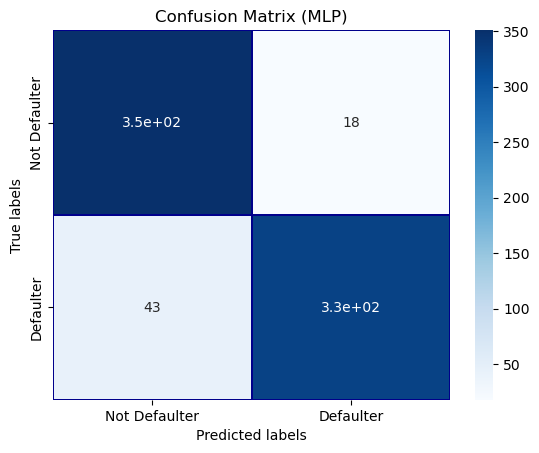

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, MLP_test_pred)
ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (MLP)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

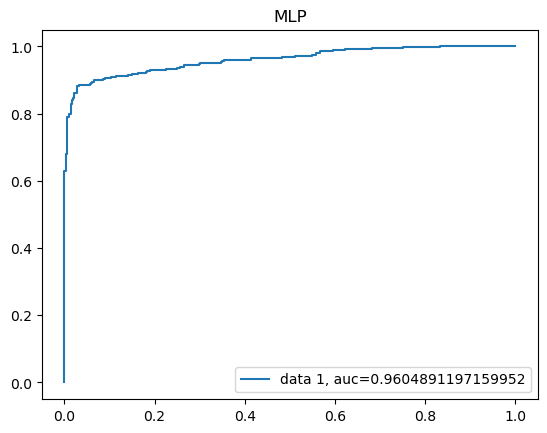

In [ ]:
y_pred_proba = MLP.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('MLP')
plt.legend(loc=4)
plt.show()

In [ ]:
# print models accuracy
print('test_ratio', test_ratio)
print("Logistic Regression Accuracy: ", logistic_accuracy)
print("Decision Tree Accuracy: ", decision_tree_accuracy)
print("Random Forest Accuracy: ", random_forest_accuracy)
print("XGBoost Accuracy: ", xgboost_accuracy)
print("MLP Accuracy: ", MLP_accuracy)

test_ratio 0.3
Logistic Regression Accuracy:  0.904054054054054
Decision Tree Accuracy:  0.8094594594594594
Random Forest Accuracy:  0.9283783783783783
XGBoost Accuracy:  0.9256756756756757
MLP Accuracy:  0.9175675675675675
